<a href="https://colab.research.google.com/github/deblina0/Recommendation-System/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Problem Statement**


- **Description:** Build a recommendation system for products or content
based on user behaviour and preferences. This enhances user
experience by suggesting relevant items.
- **Why:** Recommendation systems increase user engagement and sales
by providing personalized recommendations.
- **Tasks:**
    ▪ Collect user interaction data.

    ▪ Example datasets Click Here

    ▪ Preprocess data (normalization, handling missing values).

    ▪ Apply recommendation algorithms (collaborative filtering, contentbased filtering).

    ▪ Evaluate recommendations and improve the model.

Loading files to google colab

In [2]:
from google.colab import files
uploaded = files.upload()

Saving fashion_products.csv to fashion_products.csv


importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
fashion = pd.read_csv("fashion_products.csv")

In [5]:
fashion.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [6]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [7]:
fashion.isnull().sum().sum()

0

In [8]:
fashion.duplicated().sum()

0

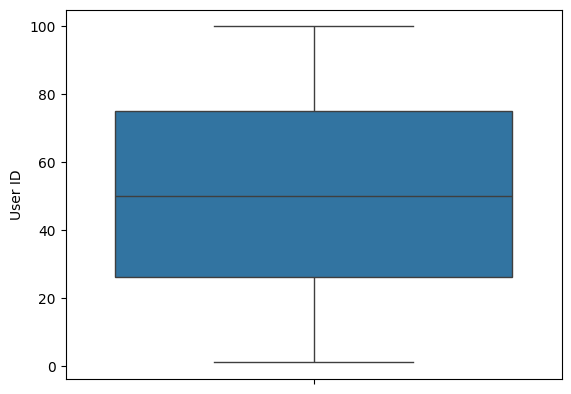

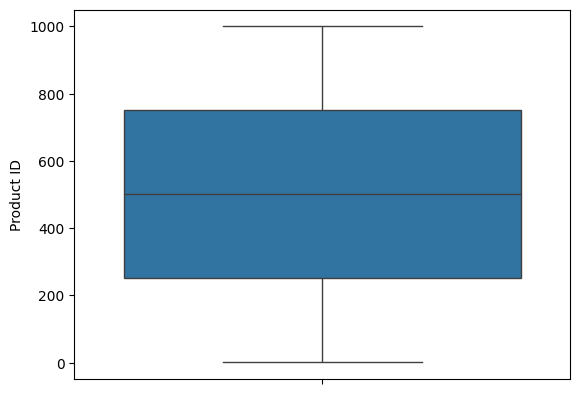

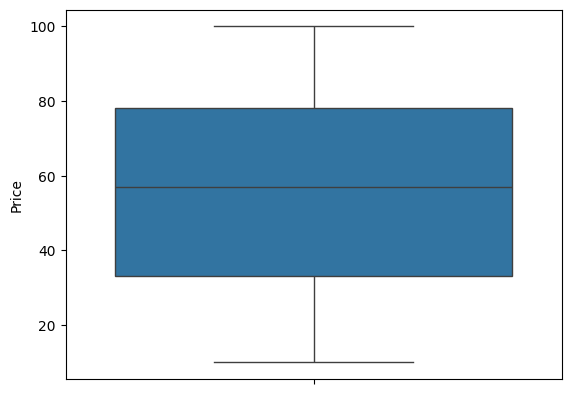

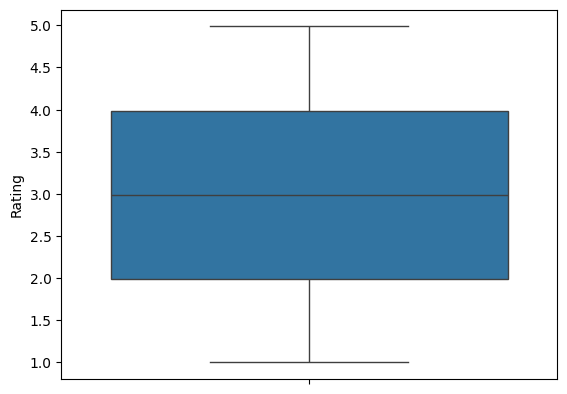

In [9]:
#finding the outliers
for i in fashion.columns:
  if fashion[i].dtype != 'object':
    sns.boxplot(fashion[i])
    plt.show()

In [12]:
fashion.columns

Index(['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price',
       'Rating', 'Color', 'Size'],
      dtype='object')

Encoding the columns

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [26]:
Cols_to_encode = ['Product Name', 'Brand', 'Color', 'Category']

In [27]:
for col in Cols_to_encode:
  fashion[col] = le.fit_transform(fashion[col])

In [29]:
fashion.drop('Size', axis = 1, inplace = True)

In [30]:
fashion

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color
0,19,1,0,0,1,40,1.043159,0
1,97,2,2,2,2,82,4.026416,2
2,25,3,0,0,2,44,3.337938,0
3,57,4,2,4,1,23,1.049523,4
4,79,5,4,0,1,79,4.302773,0
...,...,...,...,...,...,...,...,...
995,20,996,2,4,2,55,1.620081,4
996,42,997,3,3,0,13,1.544464,3
997,9,998,3,4,1,47,3.961913,4
998,8,999,4,4,2,68,3.089722,4


Splitting the data set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = fashion.drop('Rating', axis=1)  # Replace 'target_column' with your actual target column name
y = fashion['Rating']

In [34]:
# Assuming your data is in a pandas DataFrame called 'fashion'
train_data, test_data = train_test_split(fashion, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

Applying StandardScaling

In [35]:
from sklearn.preprocessing import StandardScaler

# Assuming your features are in a DataFrame called 'X'
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

installing Surprise library

In [36]:
! pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 5.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505177 sha256=f5c0c9b9be470c28bbdccb286bf05ccec5a929263649cc1d57a8a1f88262ab9a
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [38]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Assuming 'user_id', 'product_id', and 'rating' are columns in your dataset
reader = Reader(rating_scale=(1, 5))  # Adjust rating scale if needed
fashion = Dataset.load_from_df(fashion[['User ID', 'Product ID', 'Rating']], reader)

trainset, testset = train_test_split(fashion, test_size=.25)
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

In [39]:
from surprise import accuracy

# For collaborative filtering:
rmse = accuracy.rmse(predictions)

RMSE: 1.1995
